In [1]:
#importing lib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('sp.csv',lineterminator='\n')
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,12/15/2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,3/1/2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2/25/2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,11/24/2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,12/22/2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [2]:
#viewving data set
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
        9837 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [3]:
#exploring genres colomn
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [4]:
#check for duplicated rows
df.duplicated().sum()


np.int64(0)

In [5]:
#exploring summary statistics
df.describe()


,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


In [6]:
#casting column a
df["Release_date"] = pd.to_datetime(df["Release_Date"], errors='coerce', dayfirst=False)
print(df)

     Release_Date                                 Title  \
0      12/15/2021               Spider-Man: No Way Home   
1        3/1/2022                            The Batman   
2       2/25/2022                               No Exit   
3      11/24/2021                               Encanto   
4      12/22/2021                        The King's Man   
...           ...                                   ...   
9832   10/15/1973                              Badlands   
9833    10/1/2020                      Violent Delights   
9834     5/6/2016                          The Offering   
9835    3/31/2021  The United States vs. Billie Holiday   
9836    9/23/1984                               Threads   

                                               Overview  Popularity  \
0     Peter Parker is unmasked and no longer able to...    5083.954   
1     In his second year of fighting crime, Batman u...    3827.658   
2     Stranded at a rest stop in the mountains durin...    2618.087   
3     T

In [7]:
df['Release_Date']=pd.to_datetime(df['Release_Date'], errors='coerce', dayfirst=False)
df['Only_Date']=df['Release_Date'].dt.date
df['Year']=df['Release_Date'].dt.year
df['Year'].dtypes

dtype('float64')

In [8]:
#droping overview,original_language and poster -
#making list of colomn to be dropped
cols=['Overview','Original_Language','Poster_Url\r']
df.drop(cols,axis=1,inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre', 'Release_date', 'Only_Date', 'Year'],
      dtype='object')

In [9]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_date,Only_Date,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",2021-12-15,2021-12-15,2021.0
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",2022-03-01,2022-03-01,2022.0
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller,2022-02-25,2022-02-25,2022.0
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",2021-11-24,2021-11-24,2021.0
4,2021-12-22,The King's Man,1895.511,1793,7,"Action, Adventure, Thriller, War",2021-12-22,2021-12-22,2021.0


In [10]:
def catigorize_col(df,col,labels):

  #setting the edges to cut the column accordinglly
  edges=[
       df[col].describe()['min'],
       df[col].describe()['25%'],
       df[col].describe()['50%'],
       df[col].describe()['75%'],
       df[col].describe()['max']
 ]
 #cut the column into catigories
  df[col]=pd.cut(df[col],bins=edges,labels=labels,duplicates='drop')


  return df

In [11]:
labels=['not_popular','below_avg','average','popular']
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')
df=catigorize_col(df,'Vote_Average',labels)
print(df['Vote_Average'])

0           popular
1           popular
2         below_avg
3           popular
4           average
           ...     
9832        popular
9833    not_popular
9834    not_popular
9835        average
9836        popular
Name: Vote_Average, Length: 9837, dtype: category
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Release_Date  9827 non-null   datetime64[ns]
 1   Title         9828 non-null   object        
 2   Popularity    9827 non-null   float64       
 3   Vote_Count    9827 non-null   object        
 4   Vote_Average  9726 non-null   category      
 5   Genre         9826 non-null   object        
 6   Release_date  9827 non-null   datetime64[ns]
 7   Only_Date     9827 non-null   object        
 8   Year          9827 non-null   float64       
dtypes: category(1), datetime64[ns](2), float64(2), object(4)
memory usage: 624.7+ KB


In [13]:
#exploring column
df['Vote_Average'].value_counts()

,count
Vote_Average,
not_popular,2467
popular,2450
average,2411
below_avg,2398


In [14]:
#droping  nans
df.dropna(inplace=True)
#confirming
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0
Release_date,0
Only_Date,0
Year,0


In [15]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_date,Only_Date,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",2021-12-15,2021-12-15,2021.0
1,2022-03-01,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",2022-03-01,2022-03-01,2022.0
2,2022-02-25,No Exit,2618.087,122,below_avg,Thriller,2022-02-25,2022-02-25,2022.0
3,2021-11-24,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy",2021-11-24,2021-11-24,2021.0
4,2021-12-22,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War",2021-12-22,2021-12-22,2021.0


In [16]:
#split the strings into lists
df['Genre']=df['Genre'].str.split(',')
#explode the lists
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_date,Only_Date,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021-12-15,2021-12-15,2021.0
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021-12-15,2021-12-15,2021.0
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021-12-15,2021-12-15,2021.0
3,2022-03-01,The Batman,3827.658,1151,popular,Crime,2022-03-01,2022-03-01,2022.0
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery,2022-03-01,2022-03-01,2022.0


In [17]:
#casting colomn into category
df['Genre']=df['Genre'].astype('category')
#confirming changes
df['Genre'].dtypes

CategoricalDtype(categories=[' Action', ' Adventure', ' Animation', ' Comedy', ' Crime',
                  ' Documentary', ' Drama', ' Family', ' Fantasy', ' History',
                  ' Horror', ' Music', ' Mystery', ' Romance',
                  ' Science Fiction', ' TV Movie', ' Thriller', ' War',
                  ' Western', 'Action', 'Adventure', 'Animation', 'Comedy',
                  'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
                  'History', 'Horror', 'Music', 'Mystery', 'Romance',
                  'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Release_Date  25551 non-null  datetime64[ns]
 1   Title         25551 non-null  object        
 2   Popularity    25551 non-null  float64       
 3   Vote_Count    25551 non-null  object        
 4   Vote_Average  25551 non-null  category      
 5   Genre         25551 non-null  category      
 6   Release_date  25551 non-null  datetime64[ns]
 7   Only_Date     25551 non-null  object        
 8   Year          25551 non-null  float64       
dtypes: category(2), datetime64[ns](2), float64(2), object(3)
memory usage: 1.4+ MB


In [19]:
df.nunique()

,0
Release_Date,5845
Title,9414
Popularity,8087
Vote_Count,3265
Vote_Average,4
Genre,38
Release_date,5845
Only_Date,5845
Year,100


In [20]:
#_____data visualization____
#setting up seaborn configurations
sns.set_style("whitegrid")

In [21]:
#q1:what is the most frequent genre in the dat set
#showing stats. on genre column
df['Genre'].describe()

,Genre
count,25551
unique,38
top,Thriller
freq,1960


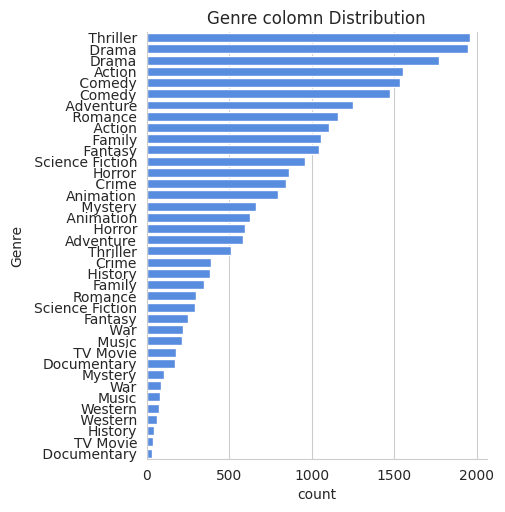

In [22]:
#visualization the genre column distribution
sns.catplot(y='Genre',data=df,kind='count',
    order=df['Genre'].value_counts().index,
           color='#4287f5')
plt.title('Genre colomn Distribution')
plt.show()

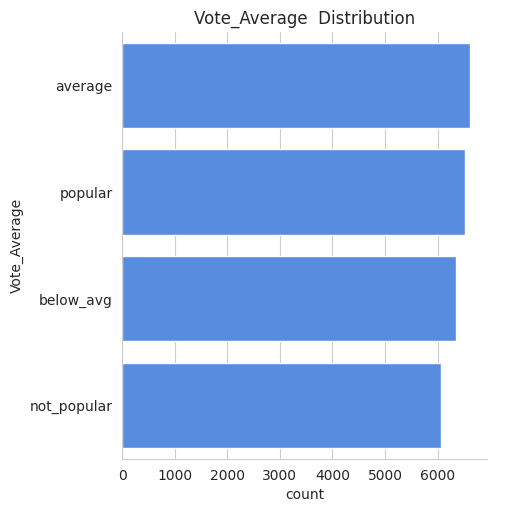

In [23]:
#q2:what genres has highest votes ?
#visualizing the vote_average column distrubution
sns.catplot(
    y='Vote_Average',
    data=df,kind='count',
    order=df['Vote_Average'].value_counts().index,
    color='#4287f5'
)
plt.title('Vote_Average  Distribution')
plt.show()

In [24]:
#q3:what movie got the highest genre?
#checking max popularity in data set
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_date,Only_Date,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021-12-15,2021-12-15,2021.0
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021-12-15,2021-12-15,2021.0
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021-12-15,2021-12-15,2021.0


In [25]:
#q4:what movie got the lowest popularity ? whats its genre
#checking max popularity in data set
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_date,Only_Date,Year
25545,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Music,2021-03-31,2021-03-31,2021.0
25546,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Drama,2021-03-31,2021-03-31,2021.0
25547,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,History,2021-03-31,2021-03-31,2021.0
25548,1984-09-23,Threads,13.354,186,popular,War,1984-09-23,1984-09-23,1984.0
25549,1984-09-23,Threads,13.354,186,popular,Drama,1984-09-23,1984-09-23,1984.0
25550,1984-09-23,Threads,13.354,186,popular,Science Fiction,1984-09-23,1984-09-23,1984.0


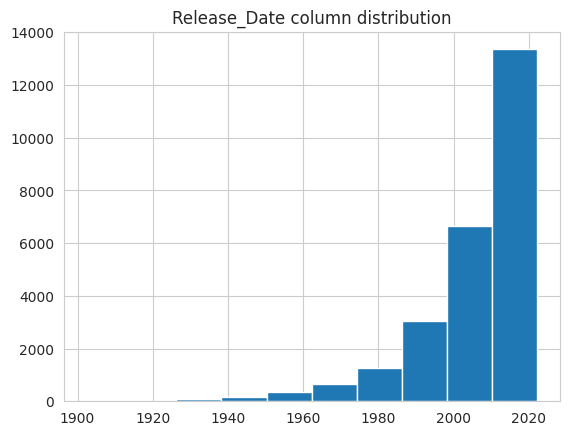

In [29]:
#q5: which year has the most filmmed movies ?
df['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.show()

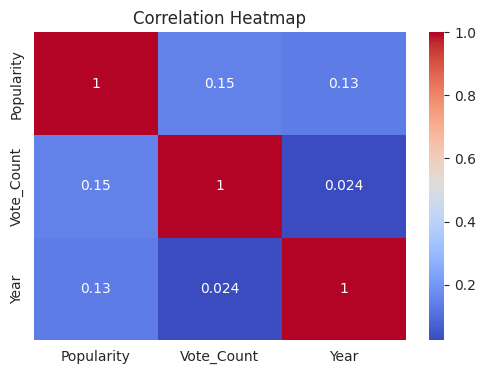

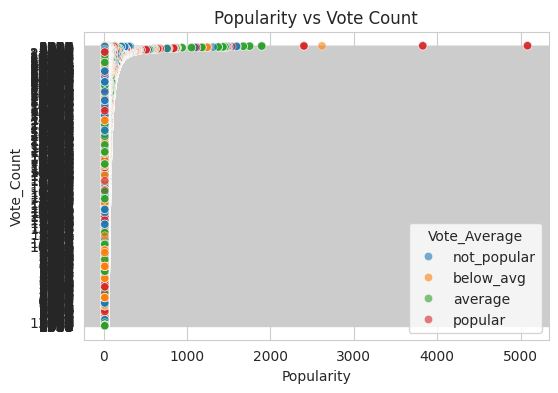

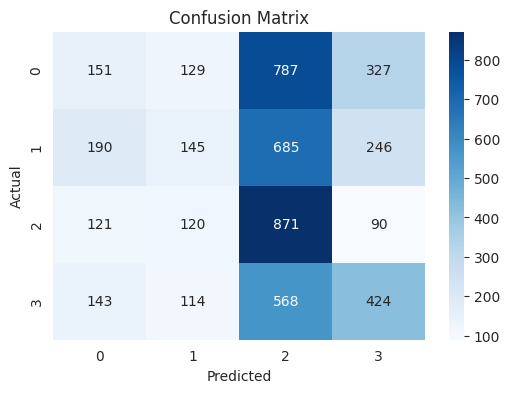

              precision    recall  f1-score   support

           0       0.25      0.11      0.15      1394
           1       0.29      0.11      0.16      1266
           2       0.30      0.72      0.42      1202
           3       0.39      0.34      0.36      1249

    accuracy                           0.31      5111
   macro avg       0.31      0.32      0.28      5111
weighted avg       0.30      0.31      0.27      5111



In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

le = LabelEncoder()
df['Vote_Average_Enc'] = le.fit_transform(df['Vote_Average'])

X = df[['Popularity', 'Vote_Count']]
y = df['Vote_Average_Enc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(6,4))
sns.heatmap(df[['Popularity', 'Vote_Count', 'Year']].corr(),annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Popularity',
    y='Vote_Count',
    hue='Vote_Average',
    data=df,
    alpha=0.6
)
plt.title("Popularity vs Vote Count")
plt.show()


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_test, y_pred))